In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table, vstack
import pandas as pd
from astropy.io import ascii
import os 
import glob 
# pd.set_option('display.max_rows', None)

In [32]:
files = glob.glob("*.snana.txt")
for file in files:
    print(file)

2020absk_data.snana.txt
2020awg_data.snana.txt
2020hgw_data.snana.txt
2020jww_data.snana.txt
2020nim_data.snana.txt
2020ovk_data.snana.txt
2020rth_data.snana.txt
2020tly_YSEdata.snana.txt
2020zx_data.snana.txt
2021arg_data.snana.txt
2021bwv_data.snana.txt
2021inc_data.snana.txt
2021krc_data.snana.txt
2021nip_data.snana.txt


In [33]:
def import_snana(filename):
    start_data = False
    table = None
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
    table['MJD']    = table['MJD'].astype(float)
    table['FLT'] = table['FLT'].astype(str)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['MAG'] = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    return(table)

In [34]:
absk = import_snana('2020absk_data.snana.txt')
awg = import_snana('2020awg_data.snana.txt')
hgw = import_snana('2020hgw_data.snana.txt')
jfo = import_snana('2020jfo_lightcurves')
jww = import_snana('2020jww_data.snana.txt')
nim = import_snana('2020nim_data.snana.txt')
ovk = import_snana('2020ovk_data.snana.txt')
rth = import_snana('2020rth_data.snana.txt')
tly = import_snana('2020tly_YSEdata.snana.txt')
zx = import_snana('2020zx_data.snana.txt')
arg = import_snana('2021arg_data.snana.txt')
bwv = import_snana('2021bwv_data.snana.txt')
inc = import_snana('2021inc_data.snana.txt')
krc = import_snana('2021krc_data.snana.txt')
nip = import_snana('2021nip_data.snana.txt')


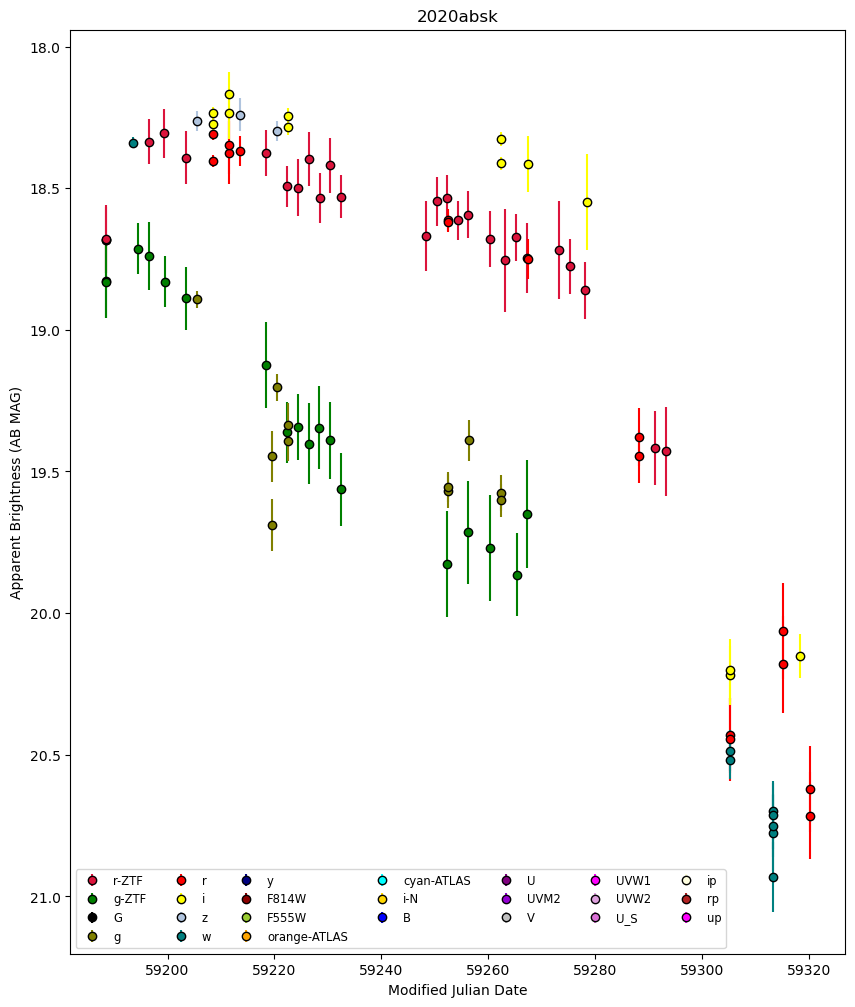

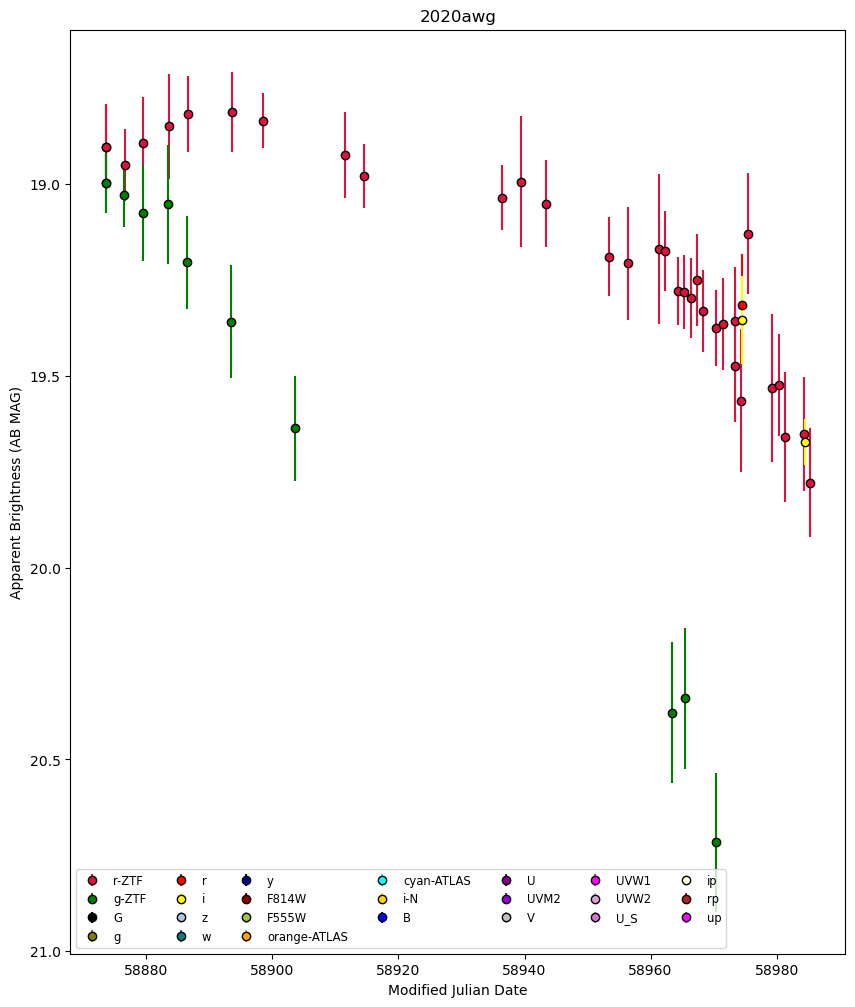

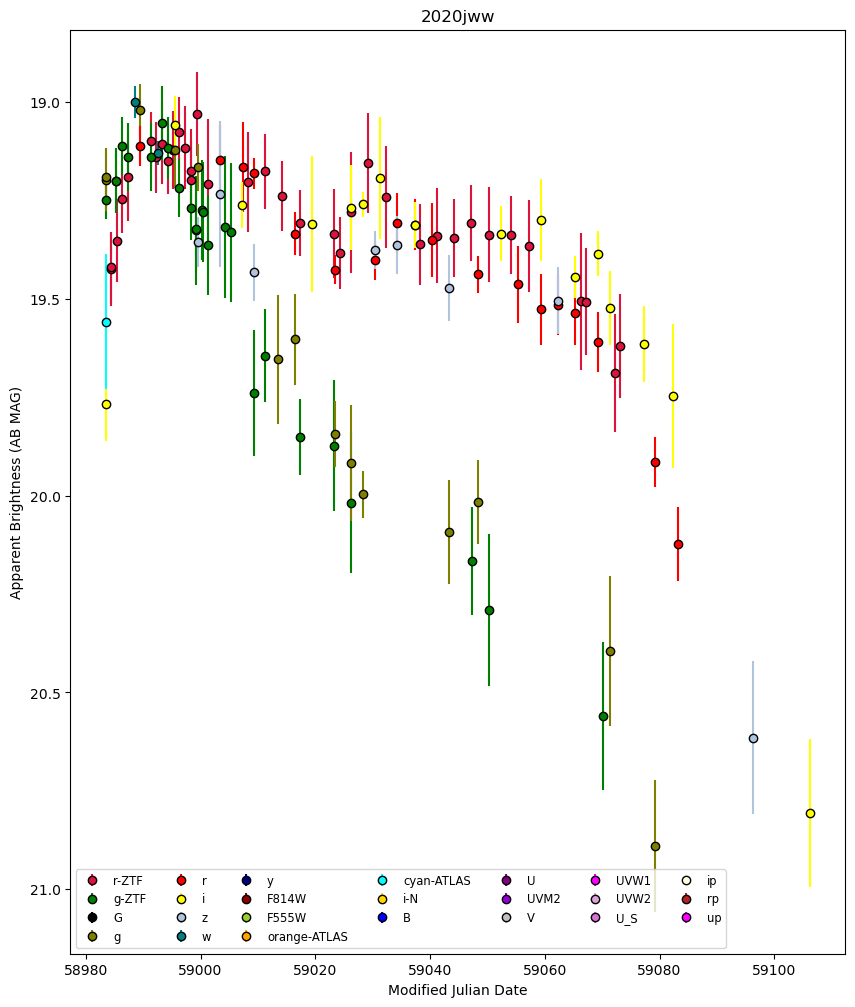

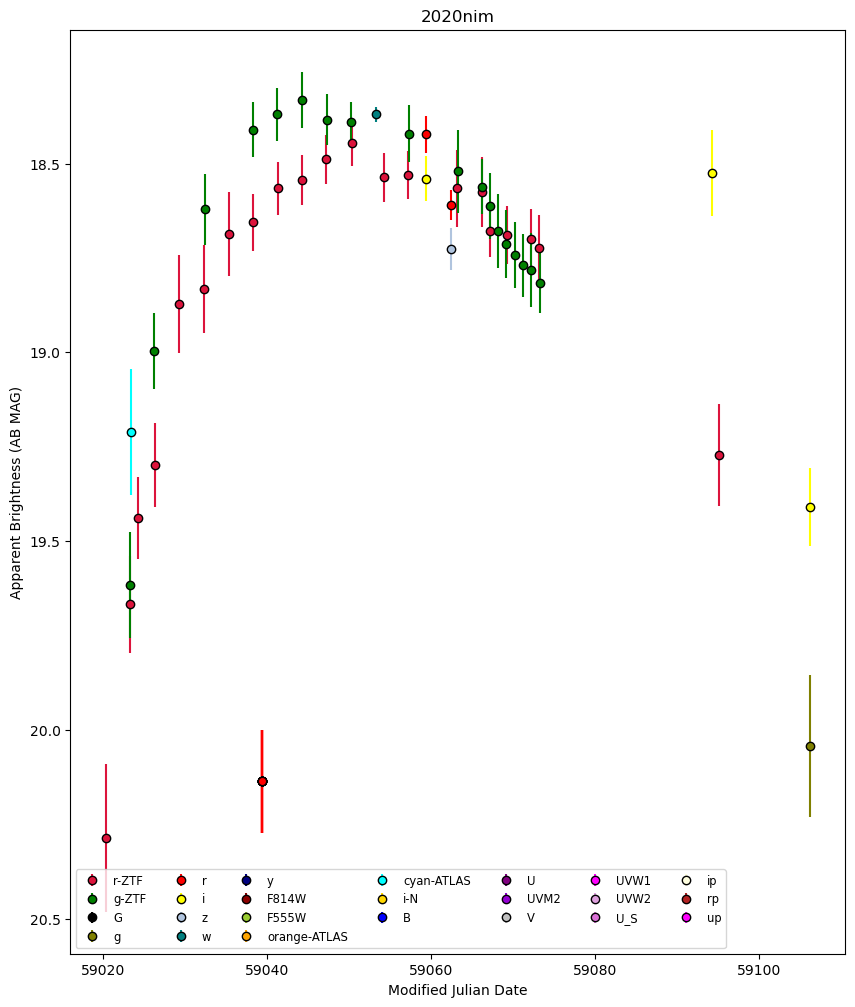

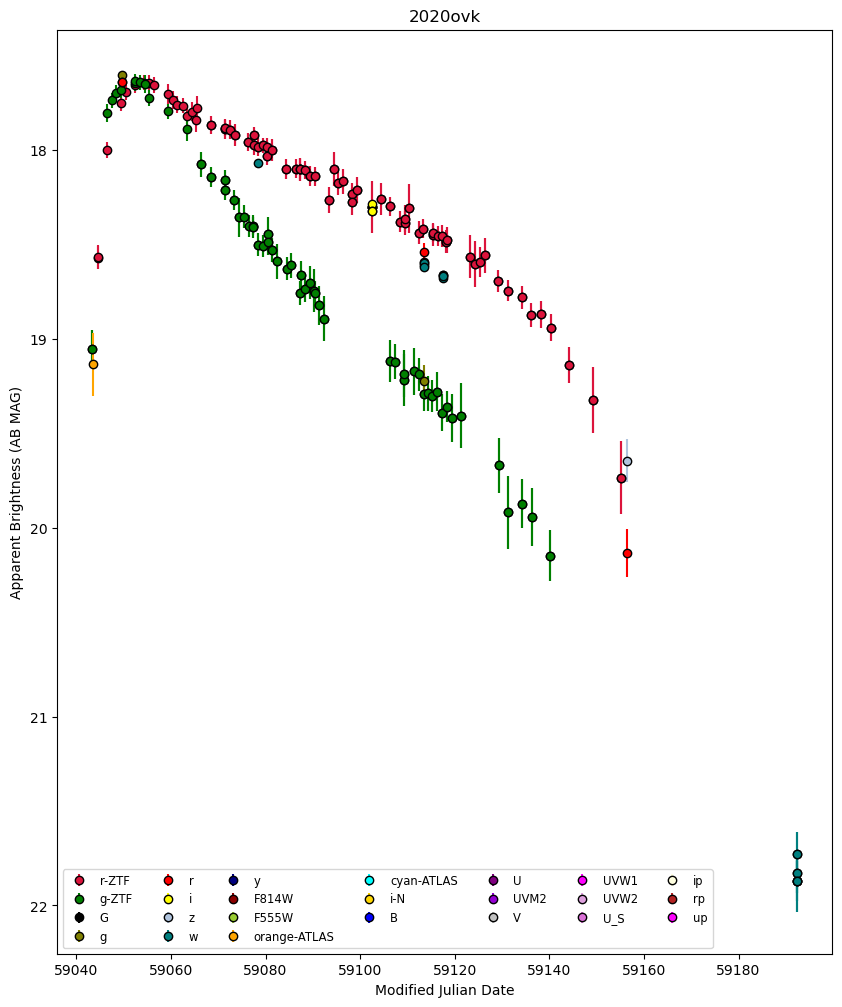

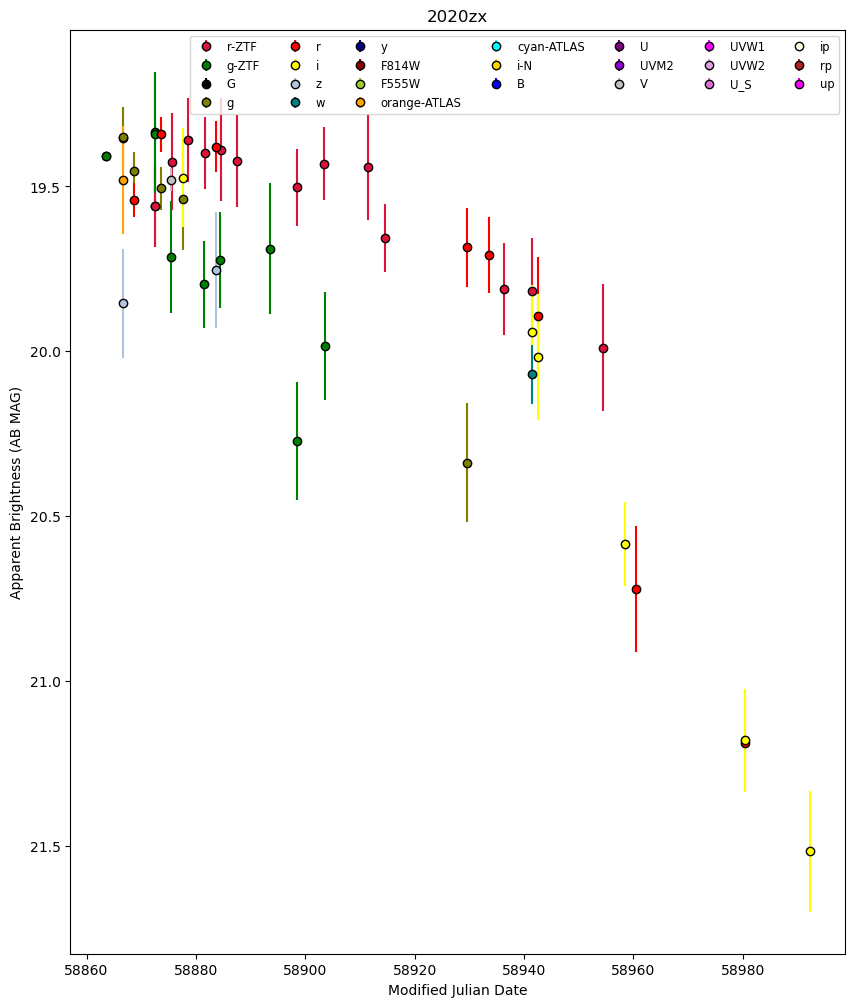

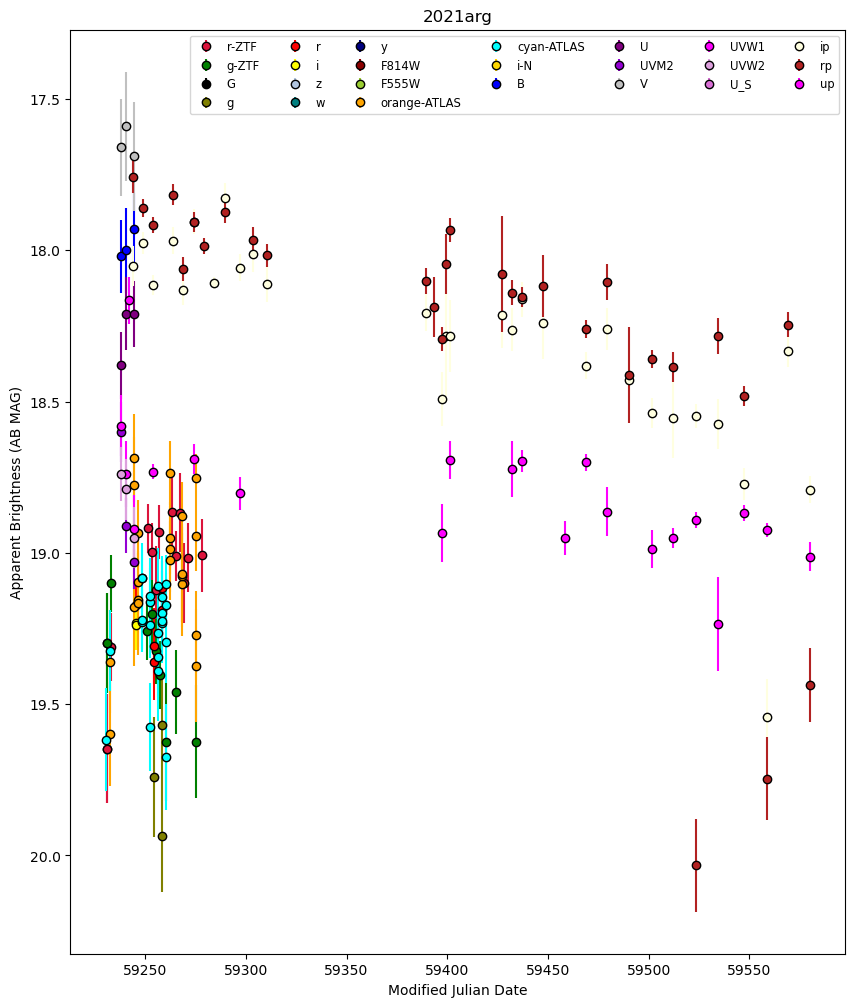

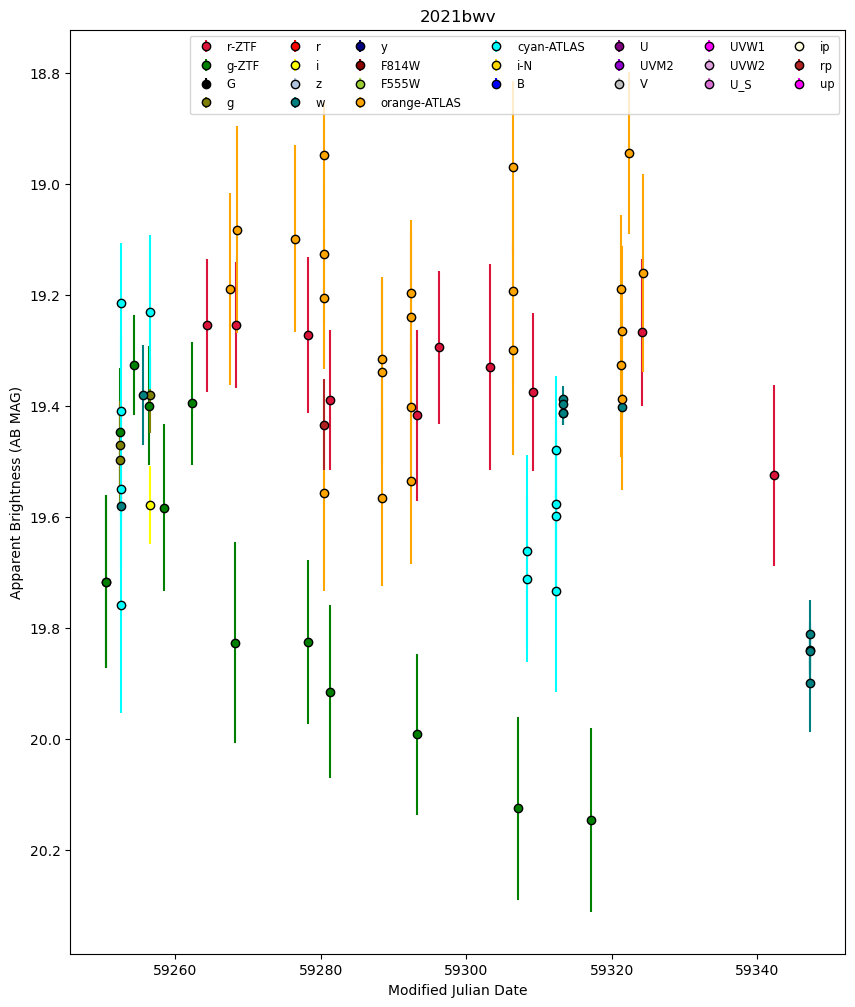

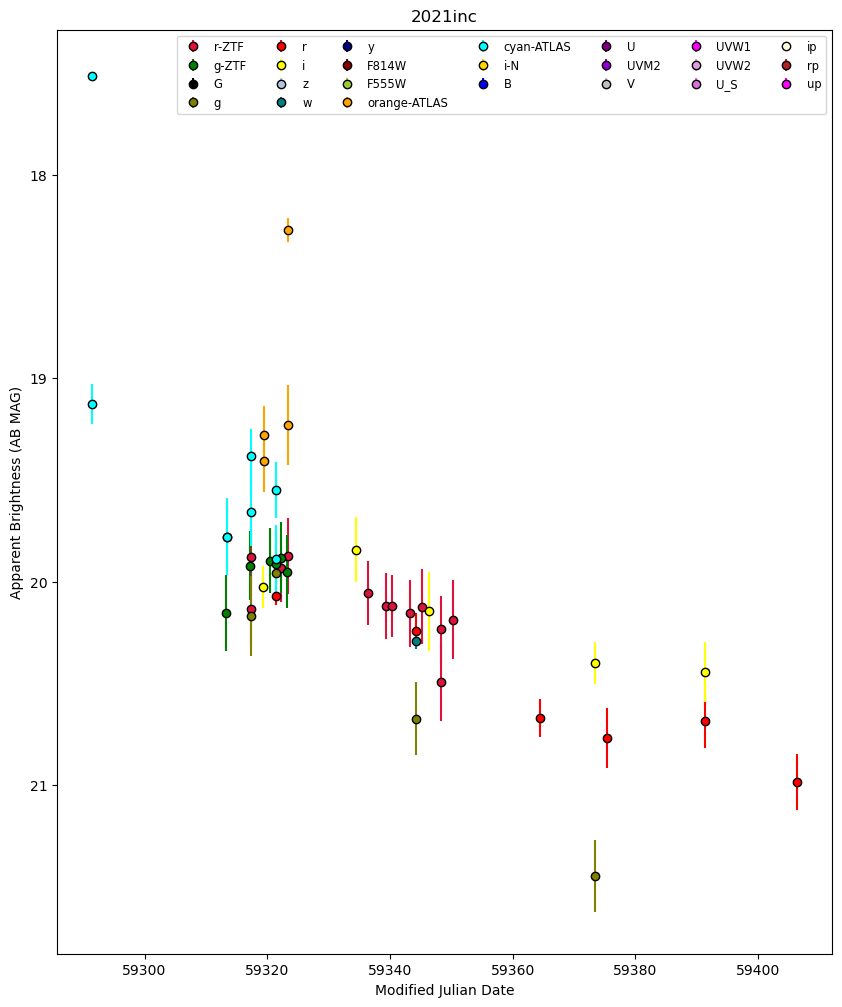

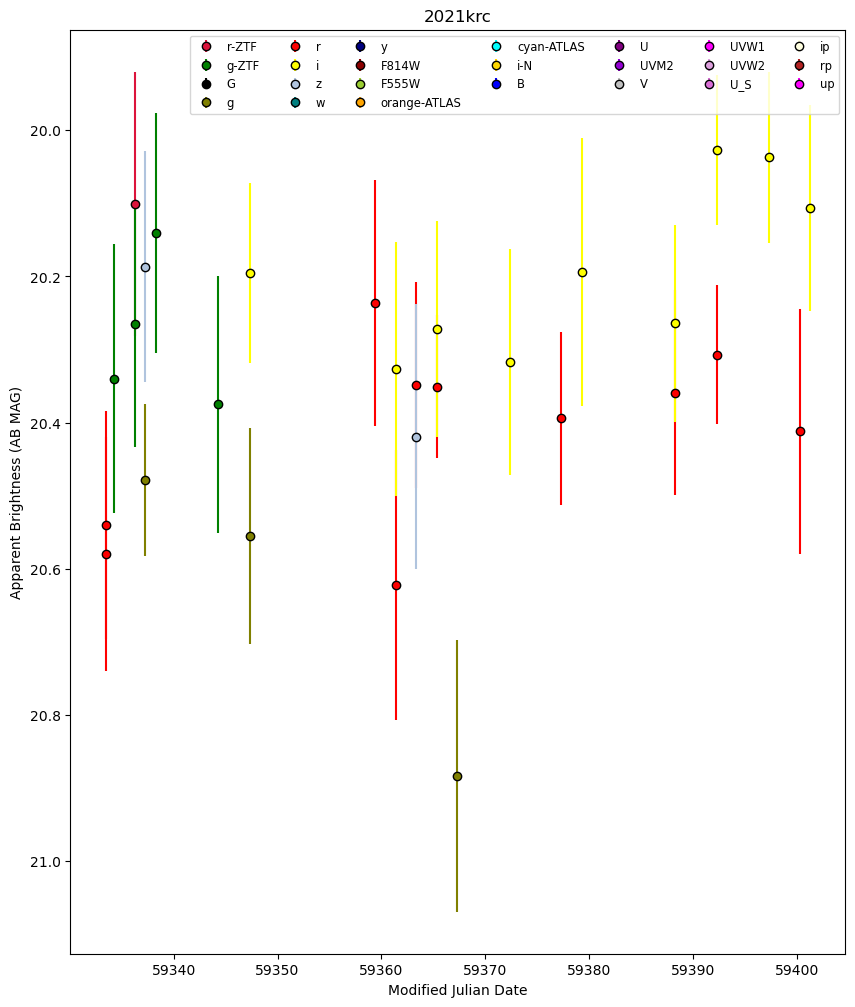

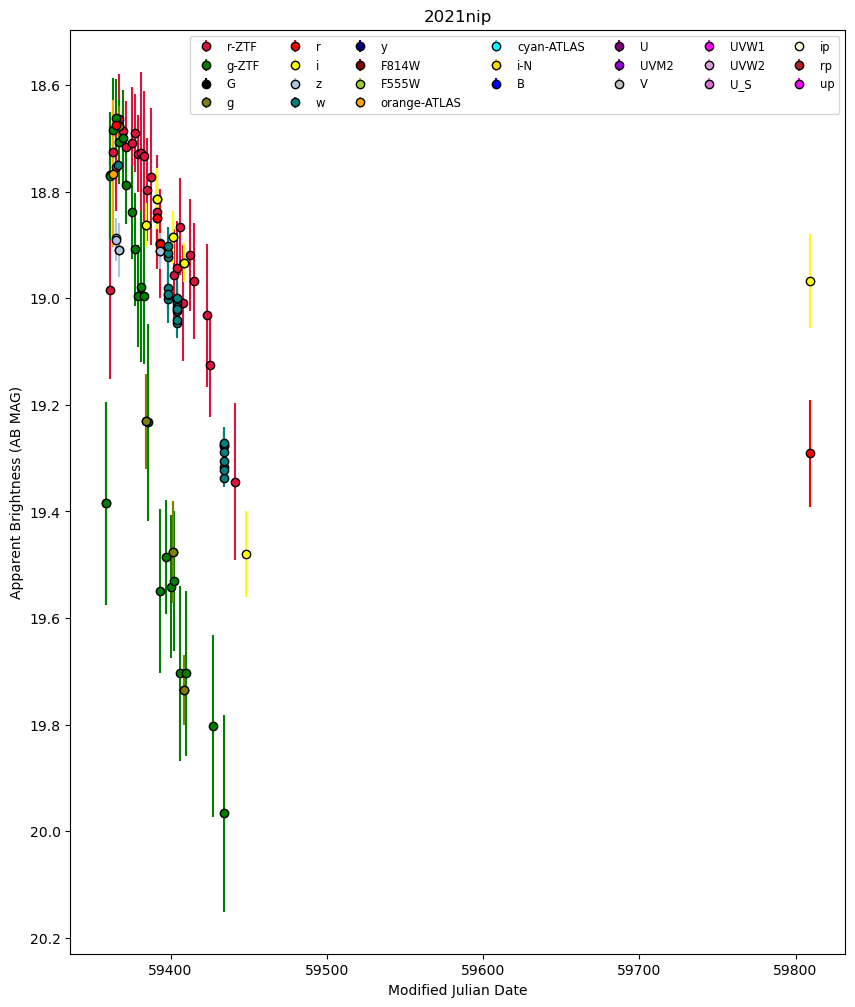

In [35]:
new_additions = [absk, awg, jww, nim, ovk, zx, arg, bwv, inc, krc, nip]
new_names = ['2020absk', '2020awg','2020jww', '2020nim', '2020ovk', '2020zx', '2021arg', '2021bwv', '2021inc', '2021krc', '2021nip']
for idx, df in enumerate(new_additions):
    plt.figure(idx)
    colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred','G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
    'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
    'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (10,12)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['G']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        GAIA[filt] = l       
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
    for i, filt in enumerate([ 'orange-ATLAS', 'cyan-ATLAS']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
    for i, filt in enumerate([ 'i-N']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(new_names[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB MAG)')
    plt.legend(ncol = 7, fontsize = 'smaller')
    

In [36]:
full_data_set = [hgw, jfo, jww, rth, tly]
full_data_set_df = []
for table in full_data_set:
    df = table.to_pandas()
    nonnegative = df.dropna()
    full_data_set_df.append(nonnegative)

full_object_names = ['2020hgw', '2020jfo', '2020jww', '2020rth', '2020tly']

In [37]:
full_data_set_df

[    VARLIST:        MJD    FLT  FLUXCAL  FLUXCALERR     MAG  MAGERR MAGSYS  \
 0       OBS:  58954.387  g-ZTF    0.067       0.067  17.882   0.067   None   
 1       OBS:  58954.444  r-ZTF    0.075       0.075  18.263   0.075   None   
 2       OBS:  58955.404  g-ZTF    0.055       0.055  17.780   0.055   None   
 3       OBS:  58955.426  r-ZTF    0.065       0.065  18.111   0.065   None   
 4       OBS:  58956.343  r-ZTF    0.055       0.055  18.028   0.055   None   
 ..       ...        ...    ...      ...         ...     ...     ...    ...   
 337     OBS:  59776.296      r    0.507       0.507  21.686   0.507   None   
 339     OBS:  59780.301      r    1.473       1.473  21.492   1.473   None   
 340     OBS:  59780.305      z    3.249       3.249  21.866   3.249   None   
 341     OBS:  59781.264      r    2.035       2.035  21.712   2.035   None   
 345     OBS:  59789.269      r    4.188       4.188  23.301   4.188   None   
 
        TELESCOPE  
 0            P48  
 1        

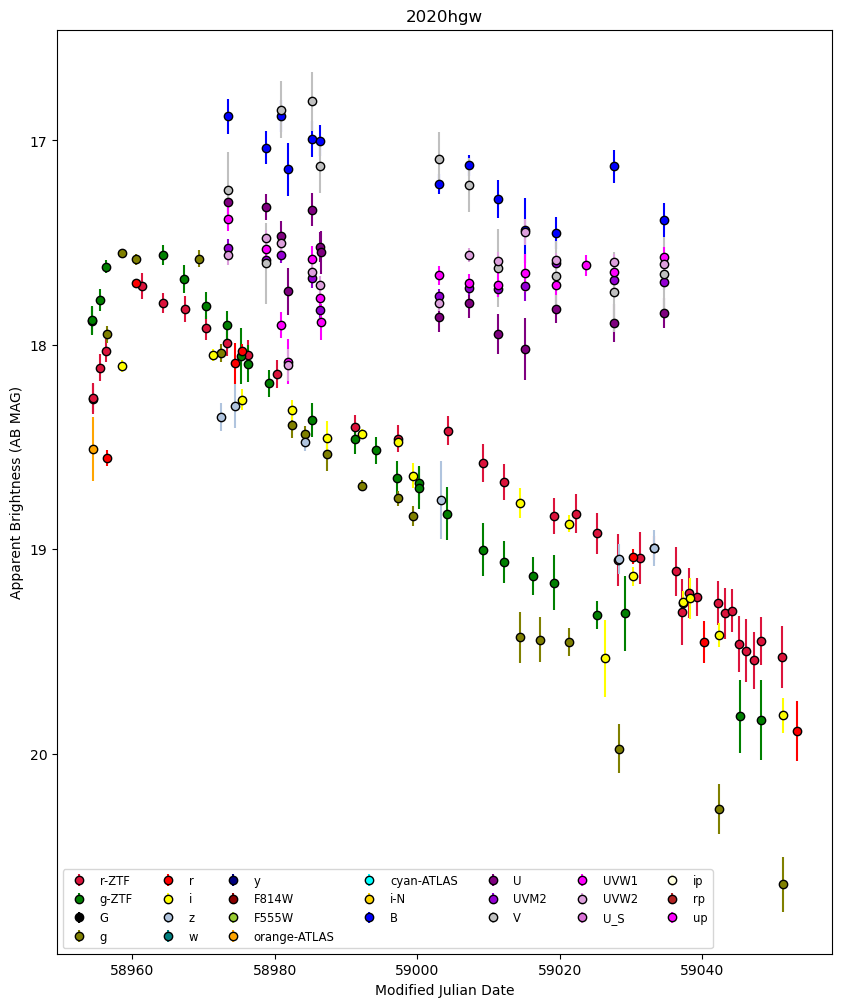

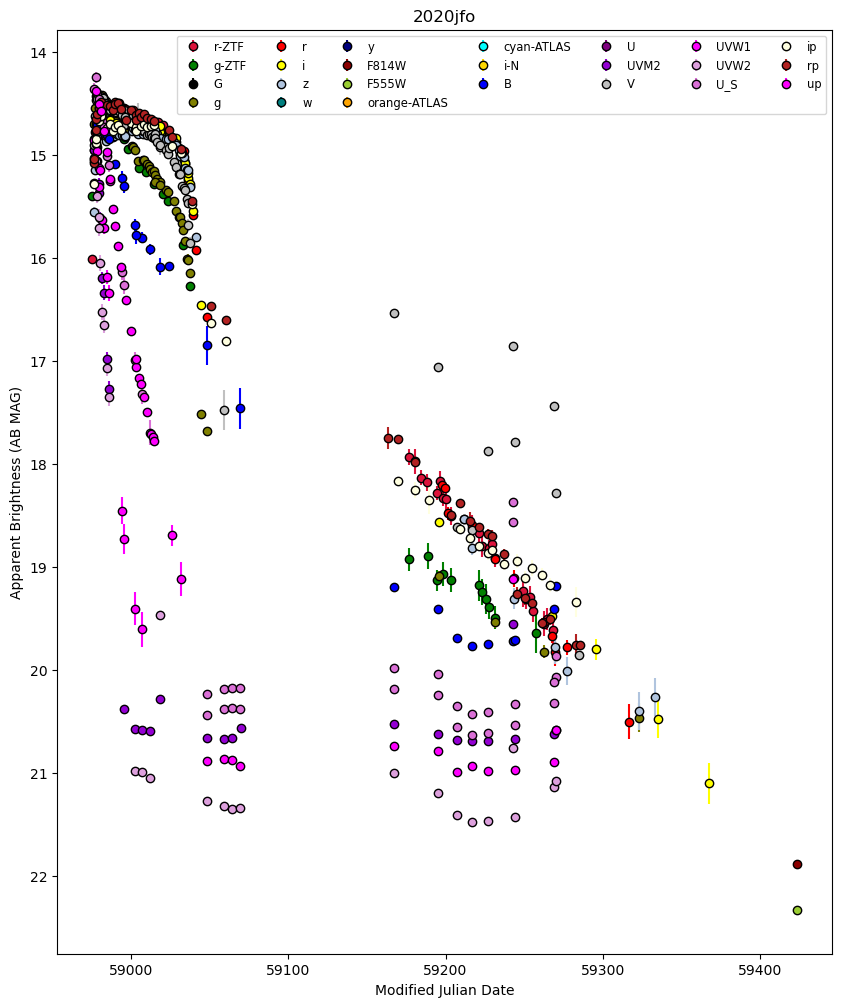

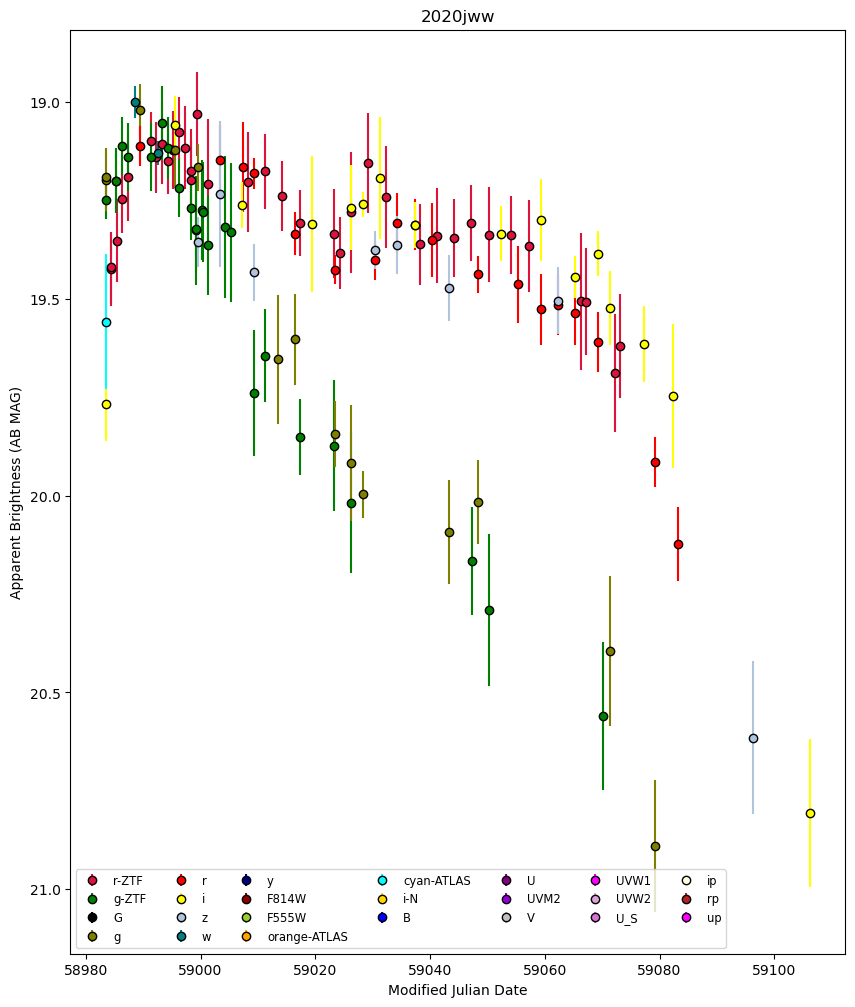

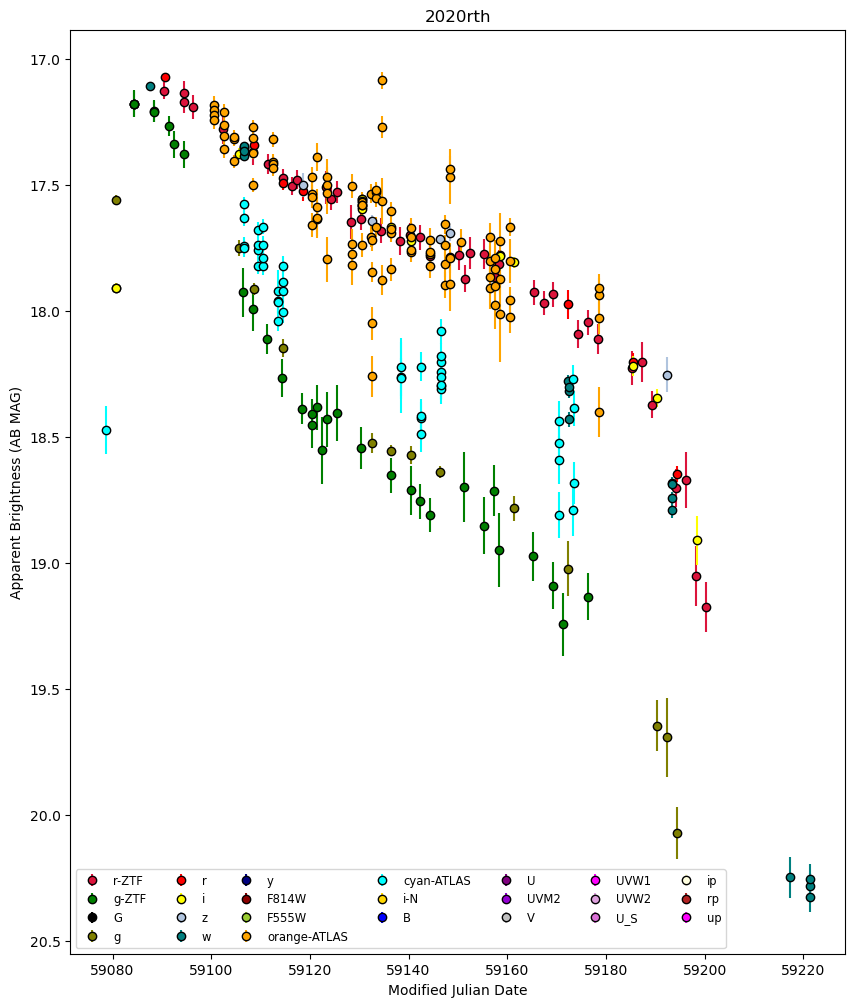

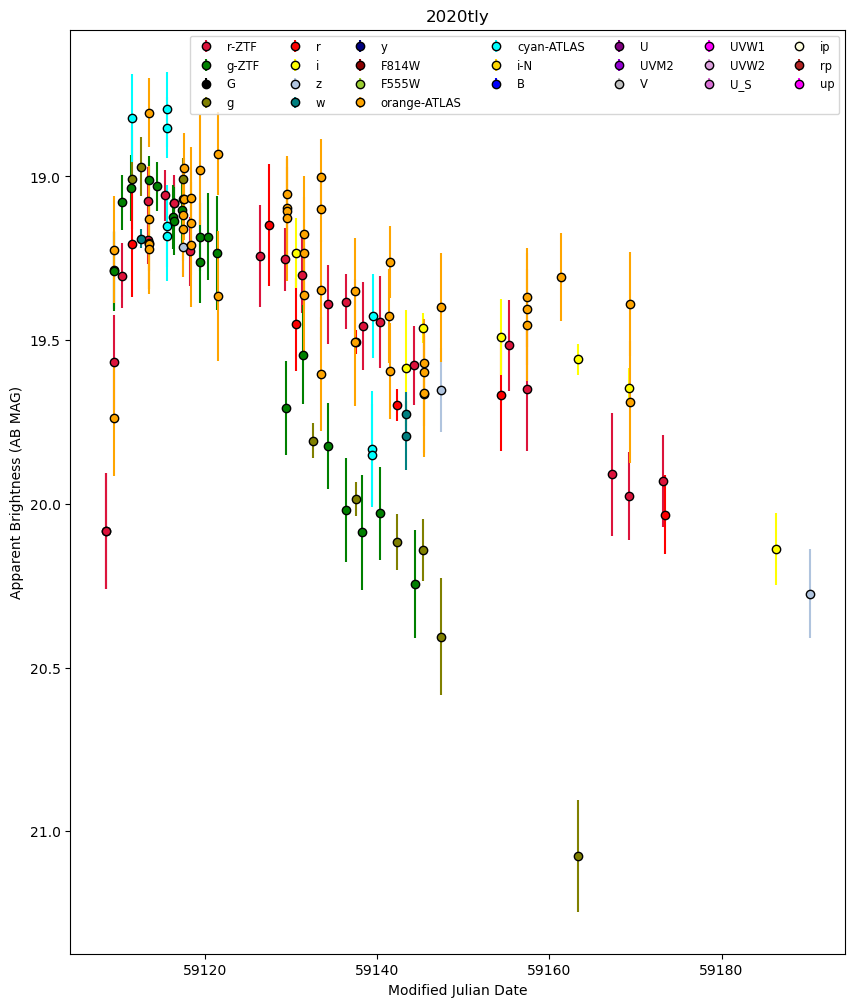

In [38]:
for idx, df in enumerate(full_data_set_df):
    plt.figure(idx)
    colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred','G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
          'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
         'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (10,12)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['G']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        GAIA[filt] = l       
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
    for i, filt in enumerate([ 'orange-ATLAS', 'cyan-ATLAS']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
    for i, filt in enumerate([ 'i-N']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = df['FLT'] == filt
        upperlim = df['MAGERR'] < .2
        nonzero = df['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_object_names[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB MAG)')
    plt.legend(ncol = 7, fontsize = 'smaller')
    


    

In [43]:
full_data_set_df

[    VARLIST:        MJD    FLT  FLUXCAL  FLUXCALERR     MAG  MAGERR MAGSYS  \
 0       OBS:  58954.387  g-ZTF    0.067       0.067  17.882   0.067   None   
 1       OBS:  58954.444  r-ZTF    0.075       0.075  18.263   0.075   None   
 2       OBS:  58955.404  g-ZTF    0.055       0.055  17.780   0.055   None   
 3       OBS:  58955.426  r-ZTF    0.065       0.065  18.111   0.065   None   
 4       OBS:  58956.343  r-ZTF    0.055       0.055  18.028   0.055   None   
 ..       ...        ...    ...      ...         ...     ...     ...    ...   
 337     OBS:  59776.296      r    0.507       0.507  21.686   0.507   None   
 339     OBS:  59780.301      r    1.473       1.473  21.492   1.473   None   
 340     OBS:  59780.305      z    3.249       3.249  21.866   3.249   None   
 341     OBS:  59781.264      r    2.035       2.035  21.712   2.035   None   
 345     OBS:  59789.269      r    4.188       4.188  23.301   4.188   None   
 
        TELESCOPE  
 0            P48  
 1        

In [48]:
# extrabol input only takes in .dat files with line 1 being redshift and line 2 being Milky Way E(B-V)
# format is TIME(MJD) APPARENT_MAGNITUDE ERROR(MAG) FILTER_SVO_ID MAG_SYSTEM
redshifts = [0.043, 0.005, 0.046, 0.0184, 0.058] 
MW_red = [0.06, 0.06, 0.06, 0.06, 0.06]
def extrabol_inputs(object, df):
    filter_svo = {'B':'Swift/UVOT.B_fil', 'U':'Swfit/UVOT.U_fil', 'UVM2':'Swift/UVOT.UVM2_fil', 'UVW1':'Swift/UVOT.UVW1_fil', 'UVW2':'Swift/UVOT.UVW2_fil', 'U_S':'Swift/UVOT.U_fil', 
    'V':'Swift/UVOT.V_fil', 'G':'GAIA/GAIA0.G', 'F555W':'HST/WFC3_UVIS1.F555W', 'F814W':'HST/WFC3_UVIS1.F814W', 'cyan-ATLAS':'Misc/Atlas.cyan', 'cyan-orange':'Misc/Atlas.orange', 
    'g':'PAN-STARRS/PS1.g', 'r':'PAN-STARRS/PS1.r', 'i':'PAN-STARRS/PS1.i', 'w': 'PAN-STARRS/PS1.w', 'y':'PAN-STARRS/PS1.y', 'z':'PAN-STARRS/PS1.z', 'g-ZTF':'Palomar/ZTF.g', 
    'r-ZTF':'Palomar/ZTF.r', 'gp':'SLOAN/SDSS.gprime_filer', 'rp':'SLOAN/SDSS.rprime_filter', 'ip':'SLOAN/SDSS.iprime_filter', 'up':'SLOAN/SDSS.uprime_filter', 'i-N': 'Generic/Cousins.I'}
    for idx, df in enumerate(full_data_set_df):
        df = df.rename(columns = {'FLT':'FLT_SVO_ID'})
        df['FLT_SVO_ID'] = df['FLT_SVO_ID'].map(filter_svo)
        df.drop(['FLUXCAL', 'FLUXCALERR', 'TELESCOPE'], axis=1, inplace=True)
        df.insert(4, 'MAG TYPE', 'AB')
        df = df[['MJD', 'MAG', 'MAGERR', 'FLT_SVO_ID', 'MAG TYPE']]
        filename = full_object_names[idx] + '.dat' 
        df.to_csv(filename, sep = ' ', header=False, index=False)
        print(df)

In [49]:
extrabol_inputs(full_data_set_df, full_object_names)

           MJD     MAG  MAGERR        FLT_SVO_ID MAG TYPE
0    58954.387  17.882   0.067     Palomar/ZTF.g       AB
1    58954.444  18.263   0.075     Palomar/ZTF.r       AB
2    58955.404  17.780   0.055     Palomar/ZTF.g       AB
3    58955.426  18.111   0.065     Palomar/ZTF.r       AB
4    58956.343  18.028   0.055     Palomar/ZTF.r       AB
..         ...     ...     ...               ...      ...
337  59776.296  21.686   0.507  PAN-STARRS/PS1.r       AB
339  59780.301  21.492   1.473  PAN-STARRS/PS1.r       AB
340  59780.305  21.866   3.249  PAN-STARRS/PS1.z       AB
341  59781.264  21.712   2.035  PAN-STARRS/PS1.r       AB
345  59789.269  23.301   4.188  PAN-STARRS/PS1.r       AB

[288 rows x 5 columns]
              MJD        MAG    MAGERR            FLT_SVO_ID MAG TYPE
0    58976.096620  14.356838  0.054204      Swift/UVOT.U_fil       AB
1    58977.700058  14.246177  0.054169      Swift/UVOT.U_fil       AB
2    58978.230370  14.395898  0.054154      Swift/UVOT.U_fil       AB
